In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape #check data and pixels

(60000, 28, 28)

In [ ]:
train_images[0, 23 ,23] #check one pixel

194

In [ ]:
train_labels[:10] #check training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/Top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

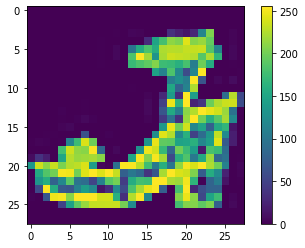

In [ ]:
plt.figure()
plt.imshow(train_images[60])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)), #input layer(1)
        keras.layers.Dense(128, activation='relu'), #hidden layer (2)
        keras.layers.Dense(10, activation='softmax') #output layer(3)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10) #pass data, labels, and epochs

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4962 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2783 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2545 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [ ]:
#test real accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8854
Test accuracy 0.8853999972343445


<h1> Make Predictions </h1>
<b>.predict() </b> pass an array of data inside

Sandal


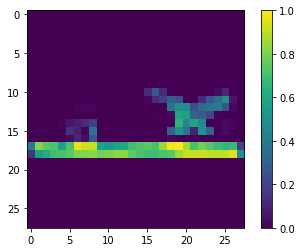

In [ ]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[90])]) #np.argmax - returns the highest value in a array
plt.figure()
plt.imshow(test_images[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
prediction[0]

array([3.7203147e-08, 3.2960332e-09, 8.8501456e-10, 8.1115887e-12,
       3.0453410e-08, 2.5208071e-03, 9.5353194e-08, 2.5169228e-03,
       1.8199865e-08, 9.9496210e-01], dtype=float32)

Pick a number: 40


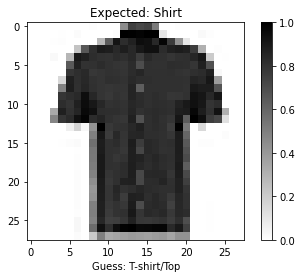

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/Top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print('Try again')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)